# Merging 

1. Atrribute based merge

In [54]:
neighbor = pd.DataFrame({
    'id': [1, 2,3,4,5],
    'neighbor_id': ['a1', 'a2','a3','c4','d5'],
    'neighbor_name': ['andy','julio','true','skewd', 'tauras']})
neighbor

,id,neighbor_id,neighbor_name
0,1,a1,andy
1,2,a2,julio
2,3,a3,true
3,4,c4,skewd
4,5,d5,tauras


In [55]:
updated_ptm = ptm.merge(neighbor, on='id')
updated_ptm

,geometry,id,criminals,neighbor_id,neighbor_name
0,POINT (1.00000 1.00000),1,12,a1,andy
1,POINT (2.00000 2.00000),2,34,a2,julio
2,POINT (2.00000 1.00000),3,112,a3,true
3,POINT (1.00000 2.00000),4,41,c4,skewd
4,POINT (1.50000 2.00000),5,212,d5,tauras


2. Spatial merge

In [58]:
pd.set_option('display.max_columns', 100)
airport = airport.set_crs('epsg:4326')
airport.tail()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,,Q7399709,,,,Sahnewal Airport,,,,सहेनवाल हवाई अड्डा,,,,,,,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,,Q7555807,,,,Solapur Airport,,,,शोलापुर विमानक्षेत्र,,,,ソーラープル空港,,,,,,,,,,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,,Q598231,,বিরসা মুন্ডা বিমানবন্দর,,Birsa Munda Airport,Aeropuerto Birsa Munda,,,बिरसा मुंडा हवाई-अड्डा,,,,ビルサ・ムンダ空港,,,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.000,,Q622296,مطار الأحواز الدولي,,,Ahwaz International Airport,Aeropuerto Internacional de Ahvaz,Aéroport d'Ahvaz,,,,Bandar Udara Internasional Ahwaz,,アフヴァーズ空港,,Ahwaz Airport,Port lotniczy Ahwaz,,,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,,Q2247561,,,,Gwalior Airport,,,,ग्वालियर विमानक्षेत्र,,,,グワーリヤル空港,,,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)


In [59]:
simple_countries = countries[['ADMIN','geometry']]
simple_countries.head()

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [61]:
airport_with_country = gpd.sjoin(airport, simple_countries, how="inner", predicate='intersects')



In [63]:
airport_with_country.tail()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry,index_right,ADMIN
806,3,Airport,major,Ferihegy,BUD,terminal,LHBP,BUD,http://en.wikipedia.org/wiki/Budapest_Ferihegy...,75.000,,Q500945,مطار بودابست فرانز ليست الدولي,,Flughafen Budapest Liszt Ferenc,Budapest Ferenc Liszt International Airport,Aeropuerto de Budapest-Ferenc Liszt,aéroport international de Budapest-Ferenc Liszt,,फेरीहेगी हवाई अड्डा,Budapest Liszt Ferenc nemzetközi repülőtér,Bandar Udara Internasional Ferihegy Budapest,Aeroporto di Budapest-Ferihegy,リスト・フェレンツ国際空港,부다페스트 리스트 페렌츠 국제공항,Luchthaven van Boedapest,Port lotniczy Budapest Liszt Ferenc,Aeroporto de Budapeste Ferenc Liszt,Международный аэропорт имени Ференца Листа,Budapest-Ferihegy flygplats,,Sân bay quốc tế Budapest Ferihegy,布達佩斯李斯特·費倫茨國際機場,4,1159126881,POINT (19.26223 47.43327),75,Hungary
827,3,Airport,major,Ruzyn,PRG,terminal,LKPR,PRG,http://en.wikipedia.org/wiki/Ruzyn%C4%9B_Inter...,75.000,,Q99172,مطار فاكلاف هافيل الدولي,,Flughafen Prag,Prague Václav Havel Airport,Aeropuerto de Praga,aéroport de Prague-Václav-Havel,Διεθνής αερολιμένας Πράγας «Βάτσλαβ Χάβελ»,,Prága-Václav Havel repülőtér,Bandar Udara Internasional Ruzyně,Aeroporto di Praga-Ruzyně,ルズィニエ国際空港,프라하 루지네 국제공항,Luchthaven Praag-Ruzyně,Port lotniczy Praga-Ruzyně,Aeroporto Internacional Ruzyne,Пражский аэропорт имени Вацлава Гавела,Václav Havel flygplats Prag,Václav Havel Havalimanı,Sân bay quốc tế Ruzyně,布拉格魯濟涅國際機場,4,1159127171,POINT (14.26748 50.10765),49,Czechia
831,2,Airport,major,Singapore Changi,SIN,terminal,WSSS,SIN,http://en.wikipedia.org/wiki/Singapore_Changi_...,150.000,,Q32159,مطار شانغي سنغافورة,সিঙ্গাপুর চাঙ্গি বিমানবন্দর,Flughafen Singapur,Singapore Changi Airport,Aeropuerto Internacional de Singapur,aéroport Changi de Singapour,,सिंगापुर चांगी अन्तर्राष्ट्रीय विमानक्षेत्र,Szingapúr-Changi repülőtér,Bandar Udara Internasional Changi Singapura,Aeroporto Internazionale di Singapore Changi,シンガポール・チャンギ国際空港,싱가포르 창이 국제공항,Internationale luchthaven Changi,Port lotniczy Singapur-Changi,Aeroporto de Singapura,Чанги,Singapore Changi Airport,Singapur Changi Havalimanı,Sân bay quốc tế Singapore Changi,新加坡樟宜机场,4,1159127223,POINT (103.98641 1.35616),227,Singapore
877,2,Airport,major,Vienna Schwechat Int'l,VIE,terminal,LOWW,VIE,http://en.wikipedia.org/wiki/Vienna_Internatio...,150.000,,Q32999,مطار فيينا الدولي,,Flughafen Wien-Schwechat,Wien-Schwechat Airport,Aeropuerto de Viena-Schwechat,aéroport de Vienne-Schwechat,Διεθνές Αεροδρόμιο της Βιέννης,वियना अन्तर्राष्ट्रीय विमानक्षेत्र,Bécs–Schwechati nemzetközi repülőtér,Bandar Udara Internasional Wina,aeroporto di Vienna - Schwechat,ウィーン国際空港,빈 국제공항,Luchthaven Wenen,Port lotniczy Wiedeń-Schwechat,Aeroporto Internacional de Viena,Вена-Швехат,Wien-Schwechats flygplats,Viyana Uluslararası Havalimanı,Sân bay quốc tế Viên,維也納國際機場,4,1159127759,POINT (16.56077 48.11976),89,Austria
887,2,Airport,major,Luis Muñoz Marin,SJU,terminal,TJSJ,SJU,http://en.wikipedia.org/wiki/Luis_Mu%C3%B1oz_M...,150.000,,Q1360523,مطار لويس مارين مونيوز,,Flughafen San Juan,Luis Muñoz Marín International Airport,Aeropuerto Internacional Luis Muñoz Marín,aéroport international Luis-Muñoz-Marín,,,,Bandar Udara Internasional Luis Muñoz Marín,Aeroporto di San Juan-Isla Verde,ルイス・ムニョス・マリン国際空港,,Luis Muñoz Marín International Airport,Port lotniczy Luis Muñoz Marín,Aeroporto Internacional Luis Muñoz Marin,Каролина,Luis Muñoz Marín International Airport,,Sân bay quốc tế Luis Muñoz Marín,路易斯·穆尼奥斯·马林国际机场,4,1159127861,POINT (-66.00423 18.43808),207,Puerto Rico


<b>op</b> : Another way to perform same query can be using operation `within` instead of `intersect` .

In [64]:
airport_with_country_within = gpd.sjoin(airport, simple_countries, how="inner", predicate='within')


/home/pnsinha/.config/jupyterlab-desktop/jlab_server/envs/custom_venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [65]:
airport_with_country_within.tail()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry,index_right,ADMIN
806,3,Airport,major,Ferihegy,BUD,terminal,LHBP,BUD,http://en.wikipedia.org/wiki/Budapest_Ferihegy...,75.000,,Q500945,مطار بودابست فرانز ليست الدولي,,Flughafen Budapest Liszt Ferenc,Budapest Ferenc Liszt International Airport,Aeropuerto de Budapest-Ferenc Liszt,aéroport international de Budapest-Ferenc Liszt,,फेरीहेगी हवाई अड्डा,Budapest Liszt Ferenc nemzetközi repülőtér,Bandar Udara Internasional Ferihegy Budapest,Aeroporto di Budapest-Ferihegy,リスト・フェレンツ国際空港,부다페스트 리스트 페렌츠 국제공항,Luchthaven van Boedapest,Port lotniczy Budapest Liszt Ferenc,Aeroporto de Budapeste Ferenc Liszt,Международный аэропорт имени Ференца Листа,Budapest-Ferihegy flygplats,,Sân bay quốc tế Budapest Ferihegy,布達佩斯李斯特·費倫茨國際機場,4,1159126881,POINT (19.26223 47.43327),75,Hungary
827,3,Airport,major,Ruzyn,PRG,terminal,LKPR,PRG,http://en.wikipedia.org/wiki/Ruzyn%C4%9B_Inter...,75.000,,Q99172,مطار فاكلاف هافيل الدولي,,Flughafen Prag,Prague Václav Havel Airport,Aeropuerto de Praga,aéroport de Prague-Václav-Havel,Διεθνής αερολιμένας Πράγας «Βάτσλαβ Χάβελ»,,Prága-Václav Havel repülőtér,Bandar Udara Internasional Ruzyně,Aeroporto di Praga-Ruzyně,ルズィニエ国際空港,프라하 루지네 국제공항,Luchthaven Praag-Ruzyně,Port lotniczy Praga-Ruzyně,Aeroporto Internacional Ruzyne,Пражский аэропорт имени Вацлава Гавела,Václav Havel flygplats Prag,Václav Havel Havalimanı,Sân bay quốc tế Ruzyně,布拉格魯濟涅國際機場,4,1159127171,POINT (14.26748 50.10765),49,Czechia
831,2,Airport,major,Singapore Changi,SIN,terminal,WSSS,SIN,http://en.wikipedia.org/wiki/Singapore_Changi_...,150.000,,Q32159,مطار شانغي سنغافورة,সিঙ্গাপুর চাঙ্গি বিমানবন্দর,Flughafen Singapur,Singapore Changi Airport,Aeropuerto Internacional de Singapur,aéroport Changi de Singapour,,सिंगापुर चांगी अन्तर्राष्ट्रीय विमानक्षेत्र,Szingapúr-Changi repülőtér,Bandar Udara Internasional Changi Singapura,Aeroporto Internazionale di Singapore Changi,シンガポール・チャンギ国際空港,싱가포르 창이 국제공항,Internationale luchthaven Changi,Port lotniczy Singapur-Changi,Aeroporto de Singapura,Чанги,Singapore Changi Airport,Singapur Changi Havalimanı,Sân bay quốc tế Singapore Changi,新加坡樟宜机场,4,1159127223,POINT (103.98641 1.35616),227,Singapore
877,2,Airport,major,Vienna Schwechat Int'l,VIE,terminal,LOWW,VIE,http://en.wikipedia.org/wiki/Vienna_Internatio...,150.000,,Q32999,مطار فيينا الدولي,,Flughafen Wien-Schwechat,Wien-Schwechat Airport,Aeropuerto de Viena-Schwechat,aéroport de Vienne-Schwechat,Διεθνές Αεροδρόμιο της Βιέννης,वियना अन्तर्राष्ट्रीय विमानक्षेत्र,Bécs–Schwechati nemzetközi repülőtér,Bandar Udara Internasional Wina,aeroporto di Vienna - Schwechat,ウィーン国際空港,빈 국제공항,Luchthaven Wenen,Port lotniczy Wiedeń-Schwechat,Aeroporto Internacional de Viena,Вена-Швехат,Wien-Schwechats flygplats,Viyana Uluslararası Havalimanı,Sân bay quốc tế Viên,維也納國際機場,4,1159127759,POINT (16.56077 48.11976),89,Austria
887,2,Airport,major,Luis Muñoz Marin,SJU,terminal,TJSJ,SJU,http://en.wikipedia.org/wiki/Luis_Mu%C3%B1oz_M...,150.000,,Q1360523,مطار لويس مارين مونيوز,,Flughafen San Juan,Luis Muñoz Marín International Airport,Aeropuerto Internacional Luis Muñoz Marín,aéroport international Luis-Muñoz-Marín,,,,Bandar Udara Internasional Luis Muñoz Marín,Aeroporto di San Juan-Isla Verde,ルイス・ムニョス・マリン国際空港,,Luis Muñoz Marín International Airport,Port lotniczy Luis Muñoz Marín,Aeroporto Internacional Luis Muñoz Marin,Каролина,Luis Muñoz Marín International Airport,,Sân bay quốc tế Luis Muñoz Marín,路易斯·穆尼奥斯·马林国际机场,4,1159127861,POINT (-66.00423 18.43808),207,Puerto Rico


<b>how</b> : We can use `left` , `right` , `inner` .

 `left`: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column

`right`: use index from second (or right_df); retain only the right_df geometry column

`inner`: use intersection of index values from both geodataframes; retain only the left_df geometry column

In [67]:
airport_with_country_right = gpd.sjoin(airport, simple_countries, how="right", predicate='within')
airport_with_country_right.head()


,index_left,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,ADMIN,geometry
0,21.0,9,Airport,mid and military,Abdul Rachman Saleh,MLG,ramp,WARA,MLG,http://en.wikipedia.org/wiki/Abdul_Rachman_Sal...,8.000,,Q1936851,,,,Abdul Rachman Saleh Airport,,aéroport Abdul Rachman Saleh,,,,Bandar Udara Abdul Rachman Saleh,,マラン,,,Port lotniczy Abdul Rachman Saleh,,,Abdul Rachman Saleh Airport,,Sân bay Abdul Rachman Saleh,,4,1159114171,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,602.0,5,Airport,major,Juanda Int'l,SUB,terminal,WARR,SUB,http://en.wikipedia.org/wiki/Juanda_Internatio...,30.000,,Q1431631,مطار جواندا الدولي,,Flughafen Juanda,Juanda International Airport,Aeropuerto Internacional Juanda,aéroport international de Surabaya,,,,Bandar Udara Internasional Juanda,,ジュアンダ国際空港,주안다 국제공항,Internationale luchthaven Juanda,Port lotniczy Surabaja-Juanda,Aeroporto Internacional Juanda,Сидоарджо,Juanda International Airport,,Sân bay quốc tế Juanda,朱安达国际机场,4,1159124227,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,193.0,8,Airport,mid,Achmad Yani,SRG,terminal,WARS,SRG,http://en.wikipedia.org/wiki/Achmad_Yani_Airport,10.000,,Q1457975,مطار أحمد ياني الدولي,,Flughafen Semarang,Achmad Yani International Airport,,aéroport international Achmad Yani,,,,Bandar Udara Internasional Achmad Yani,,アフマド・ヤニ国際空港,,Luchthaven Achmad Yani,Port lotniczy Semarang-Achmad Yani,,Международный аэропорт имени Ахмада Яни,Achmad Yani International Airport,,Sân bay Achmad Yani,三寶瓏,4,1159117439,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,266.0,8,Airport,mid,Husein Sastranegara Int'l,BDO,runway,WICC,BDO,http://en.wikipedia.org/wiki/Husein_Sastranega...,10.000,,Q49249,,,Flughafen Bandung,Husein Sastranegara International Airport,,aéroport international de Bandung,,,,Bandar Udara Internasional Husein Sastranegara,aeroporto internazionale di Husein Sastranegara,フセイン・サストラネガラ空港,,Luchthaven Husein Sastranegara,Port lotniczy Bandung-Husein Sastranegara,,,Husein Sastranegara International Airport,,Sân bay quốc tế Husein Sastranegara,萬隆國際機場,4,1159118727,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,889.0,2,Airport,major,Soekarno-Hatta Int'l,CGK,parking,WIII,CGK,http://en.wikipedia.org/wiki/Soekarno-Hatta_In...,150.000,,Q749497,مطار سوكارنو هاتا الدولي,,Flughafen Soekarno-Hatta,Soekarno–Hatta International Airport,Aeropuerto Internacional Soekarno-Hatta,aéroport international de Jakarta,,सुकानो हात्ता हवाई अड्डा,Soekarno-Hatta nemzetközi repülőtér,Bandar Udara Internasional Soekarno-Hatta,Aeroporto Internazionale Soekarno-Hatta,スカルノ・ハッタ国際空港,수카르노 하타 국제공항,Internationale luchthaven Soekarno-Hatta,Port lotniczy Dżakarta-Soekarno-Hatta,Aeroporto Internacional Soekarno-Hatta,Сукарно-Хатта,Soekarno-Hatta International Airport,Soekarno-Hatta Uluslararası Havalimanı,Sân bay quốc tế Soekarno-Hatta,蘇加諾－哈達國際機場,4,1159127891,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."


### Edit the existing data

Editing metadata

In [68]:
updated_ptm.iloc[0]

geometry         POINT (1 1)
id                         1
criminals                 12
neighbor_id               a1
neighbor_name           andy
Name: 0, dtype: object

In [69]:
updated_ptm.iloc[0,2] = 24

In [70]:
updated_ptm.iloc[0]

geometry         POINT (1 1)
id                         1
criminals                 24
neighbor_id               a1
neighbor_name           andy
Name: 0, dtype: object

Editing geometry

In [71]:
from shapely.geometry import Point

updated_point = Point(3,4)
updated_ptm.iloc[0,0] = updated_point
updated_ptm

,geometry,id,criminals,neighbor_id,neighbor_name
0,POINT (3.00000 4.00000),1,24,a1,andy
1,POINT (2.00000 2.00000),2,34,a2,julio
2,POINT (2.00000 1.00000),3,112,a3,true
3,POINT (1.00000 2.00000),4,41,c4,skewd
4,POINT (1.50000 2.00000),5,212,d5,tauras


### Querying data

1. Based on metadata

In [72]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,NaN,Indo.,INDO,Republic of Indonesia,NaN,Indonesia,NaN,NaN,Indonesia,NaN,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,NaN,Malay.,MY,Malaysia,NaN,Malaysia,NaN,NaN,Malaysia,NaN,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,NaN,Chile,CL,Republic of Chile,NaN,Chile,NaN,NaN,Chile,NaN,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,NaN,Bolivia,BO,Plurinational State of Bolivia,NaN,Bolivia,NaN,NaN,Bolivia,NaN,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,NaN,Peru,PE,Republic of Peru,NaN,Peru,NaN,NaN,Peru,NaN,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-99,South America,Americas,South America,Latin America & Caribbean,4,4,4,

In [73]:
USA = countries[countries['ADMIN'] == "United States of America"]
USA

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
153,Admin-0 country,0,2,United States of America,US1,1,2,Country,United States of America,USA,0,United States of America,USA,0,United States,USA,0,United States of America,United States,USA,United States,NaN,U.S.A.,US,United States of America,NaN,United States,NaN,NaN,United States of America,NaN,4,5,1,1,326625791,17,18560000.0,2017,2010,2016,1. Developed region: G7,1. High income: OECD,0,US,US,USA,USA,840,840,US,USA,23424977,23424977,Exact WOE match as country,USA,USA,-99,-99,North America,Americas,Northern America,North America,24,13,6,-99,1,0.0,1.7,5.7,1159321369,Q30,الولايات المتحدة,মার্কিন যুক্তরাষ্ট্র,Vereinigte Staaten,United States of America,Estados Unidos,États-Unis,Ηνωμένες Πολιτείες Αμερικής,संयुक्त राज्य अमेरिका,Amerikai Egyesült Államok,Amerika Serikat,Stati Uniti d'America,アメリカ合衆国,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-95.16057 49.36949, -95.10282 ..."


In [74]:
densly_pop = countries[countries['POP_EST'] > 100000000]
densly_pop

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,NaN,Indo.,INDO,Republic of Indonesia,NaN,Indonesia,NaN,NaN,Indonesia,NaN,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
8,Admin-0 country,0,2,India,IND,0,2,Sovereign country,India,IND,0,India,IND,0,India,IND,0,India,India,IND,India,NaN,India,IND,Republic of India,NaN,India,NaN,NaN,India,NaN,1,3,2,2,1281935911,18,8721000.0,2017,2011,2016,3. Emerging region: BRIC,4. Lower middle income,-99,IN,IN,IND,IND,356,356,IN,IND,23424848,23424848,Exact WOE match as country,IND,IND,-99,-99,Asia,Asia,Southern Asia,South Asia,5,5,5,-99,1,0.0,1.7,6.7,1159320847,Q668,الهند,ভারত,Indien,India,India,Inde,Ινδία,भारत,India,India,India,インド,인도,India,Indie,Índia,Индия,Indien,Hindistan,Ấn Độ,印度,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
9,Admin-0 country,0,2,China,CH1,1,2,Country,China,CHN,0,China,CHN,0,China,CHN,0,China,China,CHN,China,NaN,China,CN,People's Republic of China,NaN,China,NaN,NaN,China,NaN,4,4,4,3,1379302771,18,21140000.0,2017,2010,2016,3. Emerging region: BRIC,3. Upper middle income,-99,CH,CN,CHN,CHN,156,156,CN,CHN,23424781,23424781,Exact WOE match as country,CHN,CHN,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,0.0,1.7,5.7,1159320471,Q148,جمهورية الصين الشعبية,গণপ্রজাতন্ত্রী চীন,Volksrepublik China,People's Republic of China,República Popular China,République populaire de Chine,Λαϊκή Δημοκρατία της Κίνας,चीनी जनवादी गणराज्य,Kína,Republik Rakyat Tiongkok,Cina,中華人民共和国,중화인민공화국,Volksrepubliek China,Chińska Republika Ludowa,China,Китайская Народная Республика,Kina,Çin Halk Cumhuriyeti,Cộng hòa Nhân dân Trung Hoa,中华人民共和国,"MULTIPOLYGON (((78.91595 33.38766, 78.82426 33..."
13,Admin-0 country,0,2,Ethiopia,ETH,0,2,Sovereign country,Ethiopia,ETH,0,Ethiopia,ETH,0,Ethiopia,ETH,0,Ethiopia,Ethiopia,ETH,Ethiopia,NaN,Eth.,ET,Federal Democratic Republic of Ethiopia,NaN,Ethiopia,NaN,NaN,Ethiopia,NaN,4,4,1,13,105350020,17,174700.0,2017,2007,2016,7. Least developed region,5. Low income,-99,ET,ET,ETH,ETH,231,231,ET,ETH,23424808,23424808,Exact WOE match as country,ETH,ETH,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,4,-99,1,0.0,2.0,7.0,1159320617,Q115,إثيوبيا,ইথিওপিয়া,Äthiopien,Ethiopia,Etiopía,Éthiopie,Αιθιοπία,इथियोपिया,Etiópia,Ethiopia,Etiopia,エチオピア,에티오피아,Ethiopië,Etiopia,Etiópia,Эфиопия,Etiopien,Etiyopya,Ethiopia,埃塞俄比亚,"POLYGON ((34.07070 9.45459, 34.06689 9.53118, ..."
17,Admin-0 country,0,2,Pakistan,PAK,0,2,Sovereign country,Pakistan,PAK,0,Pakistan,PAK,0,Pakistan,PAK,0,Pakistan,Pakistan,PAK,Pakistan,NaN,Pak.,PK,Islamic Republic of Pakistan,NaN,Pakistan,NaN,NaN,Pakistan,NaN,2,2,3,11,20492486

In [75]:
countriesWithC = countries[countries['SOVEREIGNT'].str.startswith('C')]
countriesWithC

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,NaN,Chile,CL,Republic of Chile,NaN,Chile,NaN,NaN,Chile,NaN,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
7,Admin-0 country,6,5,Cyprus,CYP,0,2,Sovereign country,Cyprus,CYP,0,Cyprus,CYP,0,Cyprus,CYP,0,Cyprus,Cyprus,CYP,Cyprus,NaN,Cyp.,CY,Republic of Cyprus,NaN,Cyprus,NaN,NaN,Cyprus,NaN,1,2,3,7,1221549,12,29260.0,2017,2001,2016,6. Developing region,2. High income: nonOECD,-99,CY,CY,CYP,CYP,196,196,CY,CYP,-90,23424994,WOE lists as subunit of united Cyprus,CYP,CYP,-99,-99,Asia,Asia,Western Asia,Europe & Central Asia,6,6,4,-99,1,0.0,4.5,9.5,1159320533,Q229,قبرص,সাইপ্রাস,Republik Zypern,Cyprus,Chipre,Chypre,Κύπρος,साइप्रस,Ciprus,Siprus,Cipro,キプロス,키프로스,Cyprus,Cypr,Chipre,Кипр,Cypern,Kıbrıs Cumhuriyeti,Cộng hòa Síp,賽普勒斯,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34..."
9,Admin-0 country,0,2,China,CH1,1,2,Country,China,CHN,0,China,CHN,0,China,CHN,0,China,China,CHN,China,NaN,China,CN,People's Republic of China,NaN,China,NaN,NaN,China,NaN,4,4,4,3,1379302771,18,21140000.0,2017,2010,2016,3. Emerging region: BRIC,3. Upper middle income,-99,CH,CN,CHN,CHN,156,156,CN,CHN,23424781,23424781,Exact WOE match as country,CHN,CHN,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,0.0,1.7,5.7,1159320471,Q148,جمهورية الصين الشعبية,গণপ্রজাতন্ত্রী চীন,Volksrepublik China,People's Republic of China,República Popular China,République populaire de Chine,Λαϊκή Δημοκρατία της Κίνας,चीनी जनवादी गणराज्य,Kína,Republik Rakyat Tiongkok,Cina,中華人民共和国,중화인민공화국,Volksrepubliek China,Chińska Republika Ludowa,China,Китайская Народная Республика,Kina,Çin Halk Cumhuriyeti,Cộng hòa Nhân dân Trung Hoa,中华人民共和国,"MULTIPOLYGON (((78.91595 33.38766, 78.82426 33..."
29,Admin-0 country,0,5,Costa Rica,CRI,0,2,Sovereign country,Costa Rica,CRI,0,Costa Rica,CRI,0,Costa Rica,CRI,0,Costa Rica,Costa Rica,CRI,Costa Rica,NaN,C.R.,CR,Republic of Costa Rica,NaN,Costa Rica,NaN,NaN,Costa Rica,NaN,3,2,4,2,4930258,12,79260.0,2017,2011,2016,5. Emerging region: G20,3. Upper middle income,-99,CS,CR,CRI,CRI,188,188,CR,CRI,23424791,23424791,Exact WOE match as country,CRI,CRI,-99,-99,North America,Americas,Central America,Latin America & Caribbean,10,10,4,-99,1,0.0,3.0,8.0,1159320525,Q800,كوستاريكا,কোস্টা রিকা,Costa Rica,Costa Rica,Costa Rica,Costa Rica,Κόστα Ρίκα,कोस्टा रीका,Costa Rica,Kosta Rika,Costa Rica,コスタリカ,코스타리카,Costa Rica,Kostaryka,Costa Rica,Коста-Рика,Costa Rica,Kosta Rika,Costa Rica,哥斯达黎加,"MULTIPOLYGON (((-83.64436 10.92593, -83.62426 ..."
49,Admin-0 country,0,5,Czechia,CZE,0,2,Sovereign country,Czechia,CZE,0,Czechia,CZE,0,Czechia,CZE,0,Czechia,Czech Republic,CZE,Czechia,NaN,Cz.,CZ,Czech Republic,la République tchèque,Czechia,NaN,NaN,Czechia,Česko,1,1,2,6,10674723,1

In [76]:
densecountriesWithC = countries[(countries['SOVEREIGNT'].str.startswith('C')) &  (countries['POP_EST'] > 1000000000)]
densecountriesWithC

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
9,Admin-0 country,0,2,China,CH1,1,2,Country,China,CHN,0,China,CHN,0,China,CHN,0,China,China,CHN,China,NaN,China,CN,People's Republic of China,NaN,China,NaN,NaN,China,NaN,4,4,4,3,1379302771,18,21140000.0,2017,2010,2016,3. Emerging region: BRIC,3. Upper middle income,-99,CH,CN,CHN,CHN,156,156,CN,CHN,23424781,23424781,Exact WOE match as country,CHN,CHN,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,0.0,1.7,5.7,1159320471,Q148,جمهورية الصين الشعبية,গণপ্রজাতন্ত্রী চীন,Volksrepublik China,People's Republic of China,República Popular China,République populaire de Chine,Λαϊκή Δημοκρατία της Κίνας,चीनी जनवादी गणराज्य,Kína,Republik Rakyat Tiongkok,Cina,中華人民共和国,중화인민공화국,Volksrepubliek China,Chińska Republika Ludowa,China,Китайская Народная Республика,Kina,Çin Halk Cumhuriyeti,Cộng hòa Nhân dân Trung Hoa,中华人民共和国,"MULTIPOLYGON (((78.91595 33.38766, 78.82426 33..."


2. Spatial Query

Spatial query uses shapely geometry as base geometry on top of which geodataframe can be queried.
Available oprations are listed at
https://shapely.readthedocs.io/en/latest/manual.html#binary-predicates

In [77]:
USA_shape = USA['geometry'].squeeze()

In [78]:
type(USA['geometry'].squeeze())

shapely.geometry.multipolygon.MultiPolygon

<Axes: >

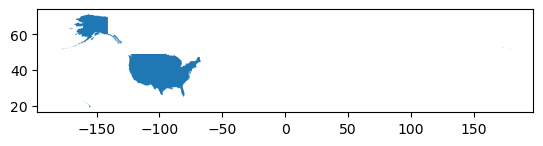

In [89]:
USA.plot()

In [79]:
test_pt = Point(1,1)

In [80]:
test_pt.intersects(USA_shape)

False

In [90]:
chicago = Point(-87.62,41.87)

In [91]:
chicago.within(USA_shape)

True

In [92]:
USA_airport = airport[airport.within(USA_shape)]

In [93]:
USA_airport

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
51,8,Airport,major,Amarillo Int'l,AMA,terminal,KAMA,AMA,http://en.wikipedia.org/wiki/Rick_Husband_Amar...,10.000,,Q1570890,,,Rick Husband Amarillo International Airport,Rick Husband Amarillo International Airport,Aeropuerto Internacional Rick Husband de Amarillo,Rick Husband Amarillo International Airport,,अमारिलो हवाई अड्डा,,,,リック・ハズバンド・アマリロ国際空港,,Rick Husband Amarillo International Airport,,Aeroporto Internacional de Amarillo,,,,,里克·赫斯本德-阿馬里洛國際機場,4,1159114695,POINT (-101.70535 35.21840)
55,8,Airport,mid,Bethel,BET,runway,PABE,BET,http://en.wikipedia.org/wiki/Bethel_Airport,10.000,,Q619997,,,Flughafen Bethel,Bethel Airport,Aeropuerto de Bethel,aéroport de Bethel,,,,,,ベセル空港,,,Port lotniczy Bethel,,Бетел,,,,伯特利機場,4,1159114773,POINT (-161.83899 60.77874)
57,8,Airport,major,Birmingham Int'l,BHM,terminal,KBHM,BHM,http://en.wikipedia.org/wiki/Birmingham_Intern...,10.000,,Q865724,,,Birmingham-Shuttlesworth International Airport,Birmingham-Shuttlesworth International Airport,Aeropuerto Internacional Birmingham-Shuttlesworth,,,,,,Aeroporto di Birmingham,バーミングハム国際空港,,Birmingham-Shuttlesworth International Airport,Port lotniczy Birmingham-Shuttlesworth,Aeroporto Internacional de Birmingham-Shuttles...,,Birmingham-Shuttlesworth International Airport,,Sân bay quốc tế Birmingham,伯明翰－沙特尔斯沃思国际机场,4,1159114807,POINT (-86.75238 33.56187)
59,8,Airport,major,Logan Int'l,BIL,terminal,KBIL,BIL,http://en.wikipedia.org/wiki/Billings_Logan_In...,10.000,,Q598269,,,Billings Logan International Airport,Billings Logan International Airport,,Billings Logan International Airport,,,,Bandar Udara Internasional Logan Billings,Aeroporto Internazionale di Billings Logan,ビリングス・ローガン国際空港,,Billings Logan International Airport,Port lotniczy Billings Logan,,,,,,比靈斯Logan國際機場,4,1159114843,POINT (-108.53693 45.80369)
60,8,Airport,mid,Bismarck Muni.,BIS,terminal,KBIS,BIS,http://en.wikipedia.org/wiki/Bismarck_Municipa...,10.000,,Q387593,,,,Bismarck Municipal Airport,Aeropuerto Municipal de Bismarck,aéroport municipal de Bismarck,,,,,,ビスマーク市営空港,,,Port lotniczy Bismarck,,Бисмарк,,,,俾斯麥市立機場,4,1159114861,POINT (-100.75747 46.77511)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,2,Airport,major,Los Angeles Int'l,LAX,terminal,KLAX,LAX,http://en.wikipedia.org/wiki/Los_Angeles_Inter...,150.000,,Q8731,مطار لوس أنجلوس الدولي,লস অ্যাঞ্জেলেস আন্তর্জাতিক বিমানবন্দর,Los Angeles International Airport,Los Angeles International Airport,Aeropuerto Internacional de Los Ángeles,aéroport international de Los Angeles,Διεθνές αεροδρόμιο του Λος Αντζελες,,Los Angeles-i nemzetközi repülőtér,Bandar Udara Internasional Los Angeles,Aeroporto Internazionale di Los Angeles,ロサンゼルス国際空港,로스앤젤레스 국제공항,internationale luchthaven van Los Angeles,Port lotniczy Los Angeles,Aeroporto Internacional de Los Angeles,Лос-Анджелес,Los Angeles International Airport,Los Angeles Uluslararası Havalimanı,Sân bay quốc tế Los Angeles,洛杉磯國際機場,4,1159127551,POINT (-118.40247 33.94417)
864,2,Airport,major,Honolulu Int'l,HNL,terminal,PHNL,HNL,http://en.wikipedia.org/wiki/Honolulu_Internat...,150.000,,Q531178,مطار هونولولو الدولي,,Honolulu International Airport,Honolulu International Airport,Aeropuerto Internacional de Honolulu,aéroport international d'Honolulu,,,,Bandar Udara Internasional Honolulu,Aeroporto Internazionale di Honolulu,ホノルル国際空港,호놀룰루 국제공항,Honolulu International Airport,Port lotniczy Honolulu,Aeroporto Internacional de Honolulu,Гонолулу,Honolulu International Airport,,Sân bay quốc tế Honolulu,檀香山國際機場,4,1159127617,POINT (-157.91978 21.33202)
865,2,Airport,major,Chicago O'Hare Int'l,ORD,terminal,KORD,ORD,http://en.wikipedi

#### Quiz -> Can you create the dataframe of all airports and cities within your country

In [ ]:
USA_river = rivers[rivers.intersects(USA_shape)]
USA_river.plot()

In [ ]:
Neighbours_USA = countries[countries.touches(USA_shape)]
Neighbours_USA.plot()

### Geospatial Operations

Understanding base logic first! Back to `shapely`

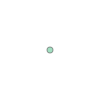

In [94]:
test_point = Point(0,0)
test_point

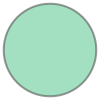

In [95]:
test_point.buffer(10)

In [96]:
test_point.buffer(10).area

313.6548490545941

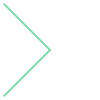

In [97]:
from shapely.geometry import LineString

test_line = LineString([(0, 0), (1, 1), (0, 2)])
test_line

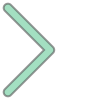

In [98]:
#Buffer puts original geometry at center and create buffer alongside
test_line.buffer(0.1)

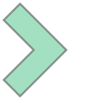

In [99]:
#We can also put geometry on either side ( Positive value will put buffer to left)

test_line.buffer(0.5, single_sided=True)

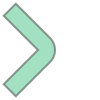

In [100]:
#We can also put geometry on either side ( negative value will put buffer to right)

test_line.buffer(-0.5, single_sided=True)

Operations on `geopandas`

In [108]:
places = gpd.read_file(path + '/ne_10m_populated_places/ne_10m_populated_places.shp')

In [109]:
USA_cities =  places[places.within(USA_shape)]

In [110]:
USA_cities

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,...,UN_ADM0,UN_LAT,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
587,8,10,1,Populated place,Faribault,NaN,NaN,0,Faribault,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,44.290486,-93.268013,0.0,0,NaN,25376,22633,25102,7,7,5026291.0,NaN,Faribault,1,0,25376.0,0.0,0.0,0.0,0.0,10.0,26.0,26.0,10.0,10.0,29.0,29.0,18.0,18.0,-93.308333,...,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q177861,85968795,0,Faribault,Faribault,Faribault,Faribault,Faribault,Фэрибо,法里博,NaN,فيرباولت,NaN,NaN,NaN,Faribault,NaN,Faribault,フェアリボー,NaN,Faribault,Faribault,Faribault,Faribault,Faribault,4,1159123115,POINT (-93.26801 44.29049)
588,8,10,1,Populated place,Mankato,NaN,NaN,0,Mankato,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,44.163621,-93.999157,0.0,0,NaN,56325,35138,56063,8,7,5036420.0,NaN,Mankato,1,0,56325.0,0.0,0.0,0.0,0.0,10.0,43.0,43.0,17.0,17.0,55.0,55.0,34.0,34.0,-94.066667,...,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q913243,85953345,0,Mankato,Mankato,Mankato,Mankato,Mankato,Манкейто,曼卡托,NaN,مانكاتو,NaN,NaN,NaN,Mankato,Mankato,Mankato,マンケート,NaN,Mankato,Mankato,Mankato,Mankato,Mankato,4,1159123133,POINT (-93.99916 44.16362)
589,8,10,1,Populated place,Albert Lea,NaN,NaN,0,Albert Lea,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,43.647787,-93.368704,0.0,0,NaN,20522,17605,20090,7,6,5016024.0,NaN,Albert Lea,1,0,20522.0,0.0,0.0,0.0,0.0,10.0,22.0,22.0,8.0,8.0,29.0,29.0,18.0,18.0,-93.400000,...,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q913476,85969077,0,Albert Lea,Albert Lea,Albert Lea,Albert Lea,Albert Lea,Альберт-Ли,NaN,NaN,ألبرت ليا، مينيسوتا,NaN,NaN,NaN,Albert Lea,NaN,Albert Lea,アルバート・リー,NaN,Albert Lea,Albert Lea,Albert Lea,Albert Lea,Albert Lea,4,1159123141,POINT (-93.36870 43.64779)
590,8,10,1,Populated place,Willmar,NaN,NaN,0,Willmar,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,45.121883,-95.043305,0.0,0,NaN,18473,18391,17963,6,6,5052916.0,NaN,Willmar,1,0,18391.0,0.0,0.0,0.0,0.0,10.0,18.0,18.0,7.0,7.0,25.0,25.0,15.0,15.0,-95.083333,...,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q1986492,85953323,0,Willmar,Willmar,Willmar,Willmar,Willmar,Уилмар,NaN,NaN,ويلمر,NaN,NaN,NaN,Willmar,NaN,Willmar,ウィルマー,NaN,Willmar,Willmar,Willmar,DeSoto,Willmar,4,1159123165,POINT (-95.04330 45.12188)
591,8,10,1,Populated place,Brainerd,NaN,NaN,0,Brainerd,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,46.358009,-94.200850,0.0,0,NaN,28187,14218,25691,7,6,5019116.0,NaN,Brainerd,1,0,28187.0,0.0,0.0,0.0,0.0,10.0,30.0,30.0,11.0,11.0,56.0,56.0,35.0,35.0,-94.308333,...,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q897435,85952675,0,Brainerd,Brainerd,Brainerd,Brainerd,Brainerd,Брейнерд,明尼蘇達州,NaN,برينرد، مينيسوتا,NaN,NaN,NaN,Brainerd,NaN,Brainerd,ブレイナード,NaN,Brainerd,Brainerd,Brainerd,Brainerd,Brainerd,4,1159123173,POINT (-94.20085 46.35801)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [160]:
USA_m = USA.to_crs(3857)
USA_cities_m = USA_cities.to_crs(3857)

In [162]:
USA_m.crs
USA_cities_m.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [113]:
USA_cities_m.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,CHANGED,NAMEDIFF,DIFFNOTE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,GEONAMEID,MEGANAME,LS_NAME,LS_MATCH,CHECKME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,...,UN_ADM0,UN_LAT,UN_LONG,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,CITYALT,min_zoom,wikidataid,wof_id,CAPALT,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
587,8,10,1,Populated place,Faribault,NaN,NaN,0,Faribault,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,44.290486,-93.268013,0.0,0,NaN,25376,22633,25102,7,7,5026291.0,NaN,Faribault,1,0,25376.0,0.0,0.0,0.0,0.0,10.0,26.0,26.0,10.0,10.0,29.0,29.0,18.0,18.0,-93.308333,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q177861,85968795,0,Faribault,Faribault,Faribault,Faribault,Faribault,Фэрибо,法里博,NaN,فيرباولت,NaN,NaN,NaN,Faribault,NaN,Faribault,フェアリボー,NaN,Faribault,Faribault,Faribault,Faribault,Faribault,4,1159123115,POINT (-10382547.685 5510506.234)
588,8,10,1,Populated place,Mankato,NaN,NaN,0,Mankato,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,44.163621,-93.999157,0.0,0,NaN,56325,35138,56063,8,7,5036420.0,NaN,Mankato,1,0,56325.0,0.0,0.0,0.0,0.0,10.0,43.0,43.0,17.0,17.0,55.0,55.0,34.0,34.0,-94.066667,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q913243,85953345,0,Mankato,Mankato,Mankato,Mankato,Mankato,Манкейто,曼卡托,NaN,مانكاتو,NaN,NaN,NaN,Mankato,Mankato,Mankato,マンケート,NaN,Mankato,Mankato,Mankato,Mankato,Mankato,4,1159123133,POINT (-10463938.263 5490797.896)
589,8,10,1,Populated place,Albert Lea,NaN,NaN,0,Albert Lea,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,43.647787,-93.368704,0.0,0,NaN,20522,17605,20090,7,6,5016024.0,NaN,Albert Lea,1,0,20522.0,0.0,0.0,0.0,0.0,10.0,22.0,22.0,8.0,8.0,29.0,29.0,18.0,18.0,-93.400000,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q913476,85969077,0,Albert Lea,Albert Lea,Albert Lea,Albert Lea,Albert Lea,Альберт-Ли,NaN,NaN,ألبرت ليا، مينيسوتا,NaN,NaN,NaN,Albert Lea,NaN,Albert Lea,アルバート・リー,NaN,Albert Lea,Albert Lea,Albert Lea,Albert Lea,Albert Lea,4,1159123141,POINT (-10393756.615 5411097.166)
590,8,10,1,Populated place,Willmar,NaN,NaN,0,Willmar,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,45.121883,-95.043305,0.0,0,NaN,18473,18391,17963,6,6,5052916.0,NaN,Willmar,1,0,18391.0,0.0,0.0,0.0,0.0,10.0,18.0,18.0,7.0,7.0,25.0,25.0,15.0,15.0,-95.083333,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q1986492,85953323,0,Willmar,Willmar,Willmar,Willmar,Willmar,Уилмар,NaN,NaN,ويلمر,NaN,NaN,NaN,Willmar,NaN,Willmar,ウィルマー,NaN,Willmar,Willmar,Willmar,DeSoto,Willmar,4,1159123165,POINT (-10580172.304 5640729.883)
591,8,10,1,Populated place,Brainerd,NaN,NaN,0,Brainerd,0.0,NaN,0.0,0,United States,USA,United States of America,USA,Minnesota,US,NaN,46.358009,-94.200850,0.0,0,NaN,28187,14218,25691,7,6,5019116.0,NaN,Brainerd,1,0,28187.0,0.0,0.0,0.0,0.0,10.0,30.0,30.0,11.0,11.0,56.0,56.0,35.0,35.0,-94.308333,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,Q897435,85952675,0,Brainerd,Brainerd,Brainerd,Brainerd,Brainerd,Брейнерд,明尼蘇達州,NaN,برينرد، مينيسوتا,NaN,NaN,NaN,Brainerd,NaN,Brainerd,ブレイナード,NaN,Brainerd,Brainerd,Brainerd,Brainerd,Brainerd,4,1159123173,POINT (-10486390.638 5837907.179)


In [123]:
city_buffer = USA_cities_m[['geometry','NAME']]
city_buffer

,geometry,NAME
587,POINT (-10382547.685 5510506.234),Faribault
588,POINT (-10463938.263 5490797.896),Mankato
589,POINT (-10393756.615 5411097.166),Albert Lea
590,POINT (-10580172.304 5640729.883),Willmar
591,POINT (-10486390.638 5837907.179),Brainerd
...,...,...
7226,POINT (-9395576.000 4006260.578),Atlanta
7227,POINT (-9768508.049 5135837.501),Chicago
7262,POINT (-13155951.864 4027717.683),Los Angeles
7263,POINT (-8572865.875 4707571.416),"Washington, D.C."


<Axes: >

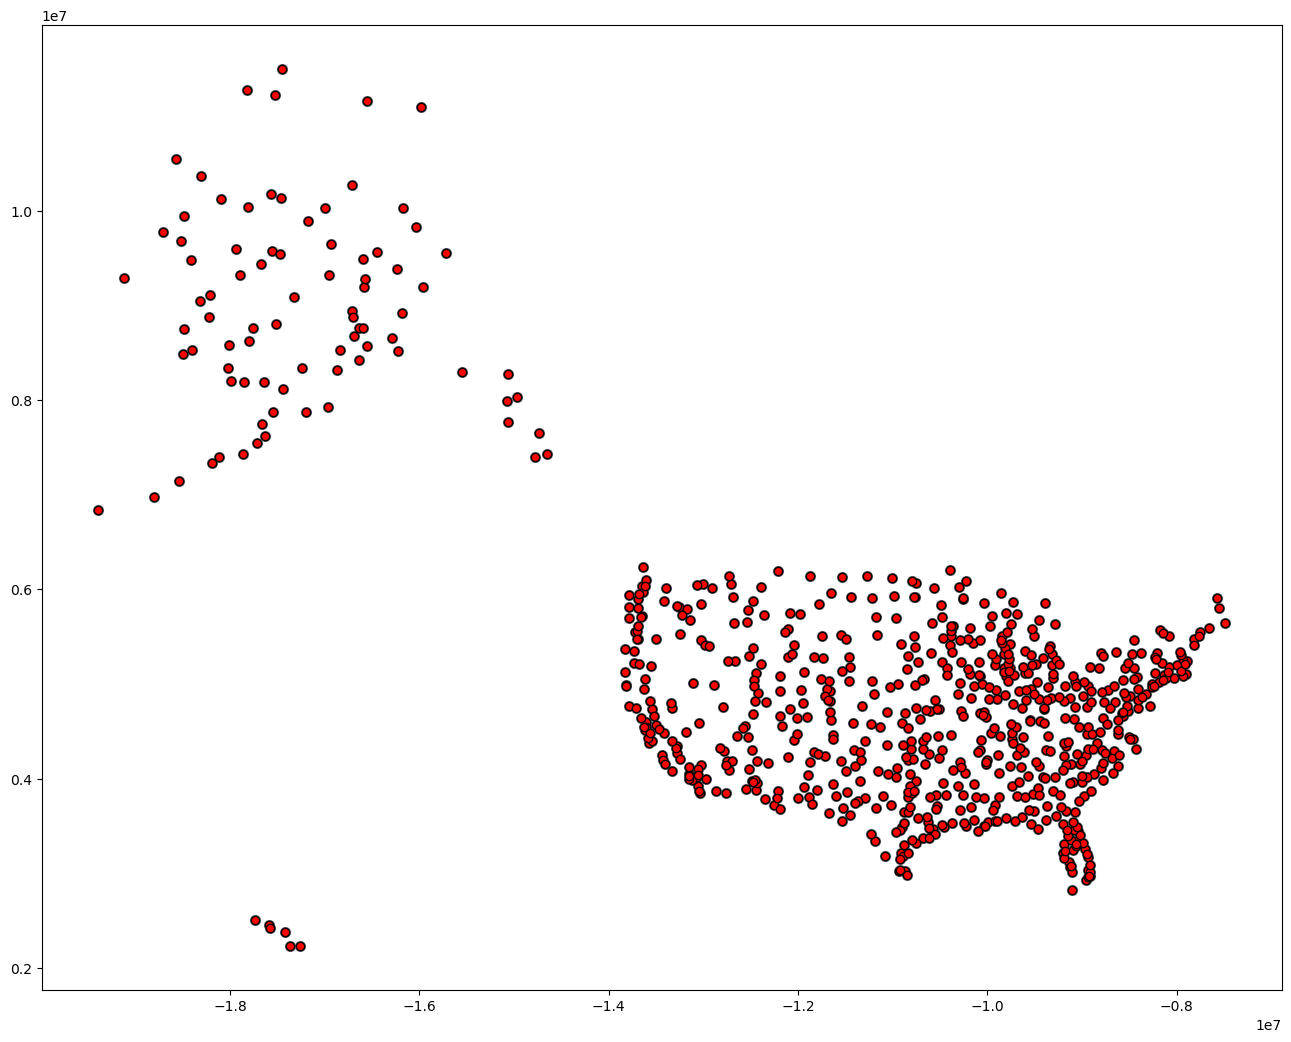

In [119]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
USA_cities_m.plot(ax=ax, color='#ffffff', edgecolor='#6a6a6a', linewidth=2)
city_buffer.plot(ax=ax, color='#f00', edgecolor='#000000')


In [124]:
city_buffer['geometry'] = city_buffer.buffer(50000)

/home/pnsinha/.config/jupyterlab-desktop/jlab_server/envs/custom_venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [125]:
city_buffer

,geometry,NAME
587,"POLYGON ((-10332547.685 5510506.234, -10332788...",Faribault
588,"POLYGON ((-10413938.263 5490797.896, -10414179...",Mankato
589,"POLYGON ((-10343756.615 5411097.166, -10343997...",Albert Lea
590,"POLYGON ((-10530172.304 5640729.883, -10530413...",Willmar
591,"POLYGON ((-10436390.638 5837907.179, -10436631...",Brainerd
...,...,...
7226,"POLYGON ((-9345576.000 4006260.578, -9345816.7...",Atlanta
7227,"POLYGON ((-9718508.049 5135837.501, -9718748.8...",Chicago
7262,"POLYGON ((-13105951.864 4027717.683, -13106192...",Los Angeles
7263,"POLYGON ((-8522865.875 4707571.416, -8523106.6...","Washington, D.C."


In [126]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,NaN,Indo.,INDO,Republic of Indonesia,NaN,Indonesia,NaN,NaN,Indonesia,NaN,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,NaN,Malay.,MY,Malaysia,NaN,Malaysia,NaN,NaN,Malaysia,NaN,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,NaN,Chile,CL,Republic of Chile,NaN,Chile,NaN,NaN,Chile,NaN,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,NaN,Bolivia,BO,Plurinational State of Bolivia,NaN,Bolivia,NaN,NaN,Bolivia,NaN,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,NaN,Peru,PE,Republic of Peru,NaN,Peru,NaN,NaN,Peru,NaN,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-99,South America,Americas,South America,Latin America & Caribbean,4,4,4,

In [127]:
countries_centroid = countries[['geometry','NAME','CONTINENT']]
countries_centroid.head()

,geometry,NAME,CONTINENT
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,Asia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,Asia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,South America
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,South America
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,South America


In [128]:
countries_centroid['geometry'] = countries_centroid['geometry'].centroid
countries_centroid.head()

/tmp/ipykernel_6853/1944803652.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries_centroid['geometry'] = countries_centroid['geometry'].centroid
/home/pnsinha/.config/jupyterlab-desktop/jlab_server/envs/custom_venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,NAME,CONTINENT
0,POINT (117.27043 -2.22296),Indonesia,Asia
1,POINT (109.69887 3.79239),Malaysia,Asia
2,POINT (-71.36437 -37.74361),Chile,South America
3,POINT (-64.68475 -16.70688),Bolivia,South America
4,POINT (-74.37806 -9.15439),Peru,South America


<Axes: >

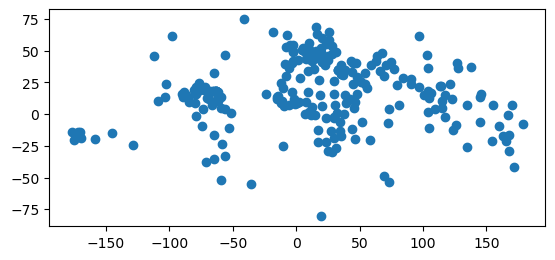

In [129]:
countries_centroid.plot()

In [131]:
countries['area'] = countries['geometry'].area
countries.head()

/tmp/ipykernel_6853/1959664899.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries['geometry'].area


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,area
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,NaN,Indo.,INDO,Republic of Indonesia,NaN,Indonesia,NaN,NaN,Indonesia,NaN,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",153.078608
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,NaN,Malay.,MY,Malaysia,NaN,Malaysia,NaN,NaN,Malaysia,NaN,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",26.703172
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,NaN,Chile,CL,Republic of Chile,NaN,Chile,NaN,NaN,Chile,NaN,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",76.761813
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,NaN,Bolivia,BO,Plurinational State of Bolivia,NaN,Bolivia,NaN,NaN,Bolivia,NaN,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",92.203587
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,NaN,Peru,PE,Republic of Peru,NaN,Peru,NaN,NaN,Peru,NaN,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-99,South America,Americas,

In [132]:
countries_m = countries.to_crs(3857)
countries_m['area'] = (countries_m['geometry'].area)/1000000
countries_m

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,area
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,NaN,Indo.,INDO,Republic of Indonesia,NaN,Indonesia,NaN,NaN,Indonesia,NaN,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",1.901567e+06
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,NaN,Malay.,MY,Malaysia,NaN,Malaysia,NaN,NaN,Malaysia,NaN,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",3.317439e+05
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,NaN,Chile,CL,Republic of Chile,NaN,Chile,NaN,NaN,Chile,NaN,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.255936e+06
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,NaN,Bolivia,BO,Plurinational State of Bolivia,NaN,Bolivia,NaN,NaN,Bolivia,NaN,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-7737827.685 -1979875.500, -7737828....",1.194826e+06
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,NaN,Peru,PE,Republic of Peru,NaN,Peru,NaN,NaN,Peru,NaN,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-99,South Americ

## Visualising GeoDataFrame

<Axes: >

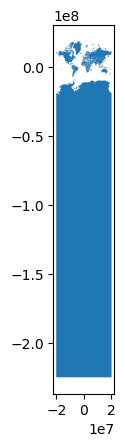

In [133]:
#simple visualisation 
countries_m.plot()

<Axes: >

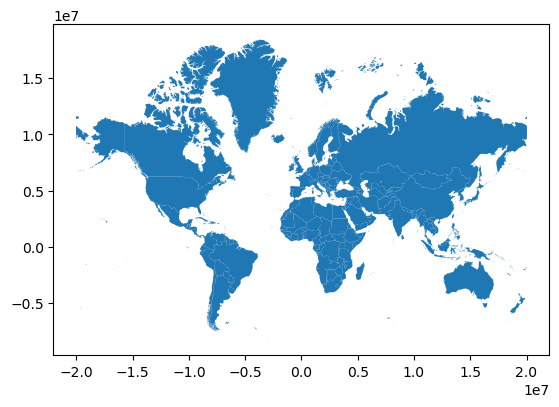

In [134]:
countries_m = countries_m[countries_m['NAME'] != "Antarctica"]
countries_m.plot()

<Axes: >

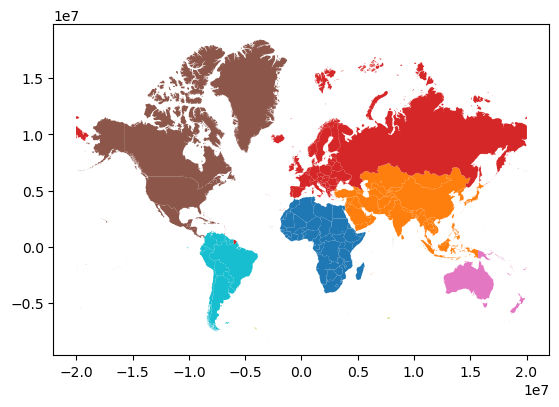

In [135]:
#color based on column
countries_m.plot(column='CONTINENT')

<Axes: >

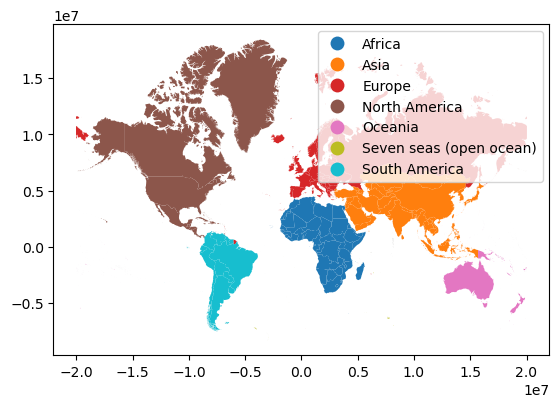

In [136]:
countries_m.plot(column='CONTINENT',legend=True)

<Axes: >

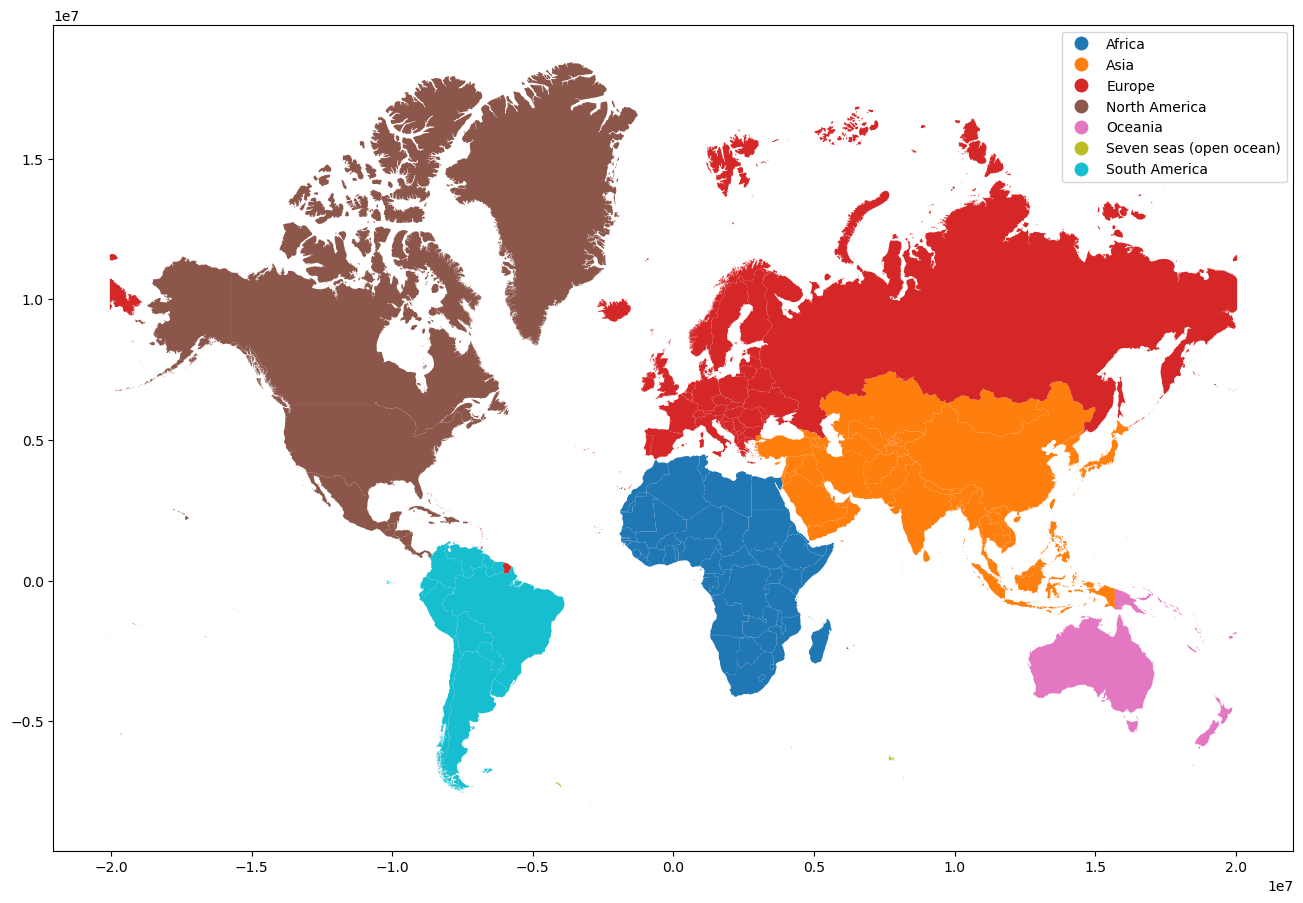

In [137]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 16))
countries_m.plot(ax=ax,column='CONTINENT',legend=True)

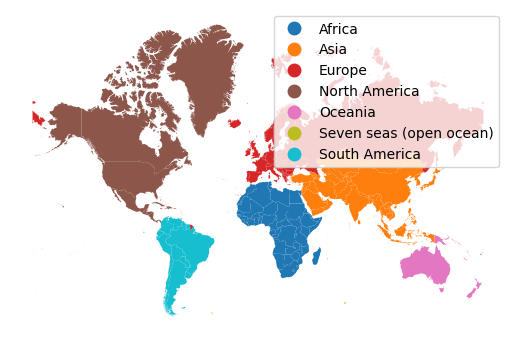

In [138]:
ax = countries_m.plot(column='CONTINENT',legend=True)
ax.set_axis_off()

<Axes: >

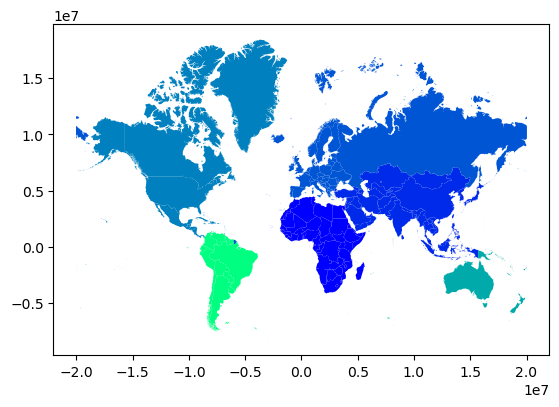

In [139]:
#Checkout available color maps => https://matplotlib.org/2.0.2/users/colormaps.html
countries_m.plot(column='CONTINENT',  cmap='winter')


<Axes: >

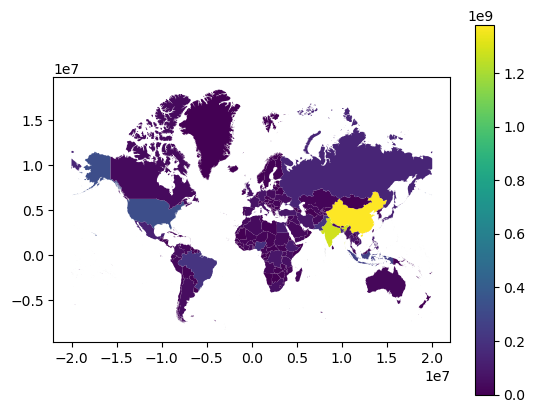

In [140]:
countries_m.plot(column='POP_EST',legend=True)


In [143]:
countries_plot = countries_m[(countries_m['NAME'] != 'India') & (countries_m['NAME'] != 'China')]

<Axes: >

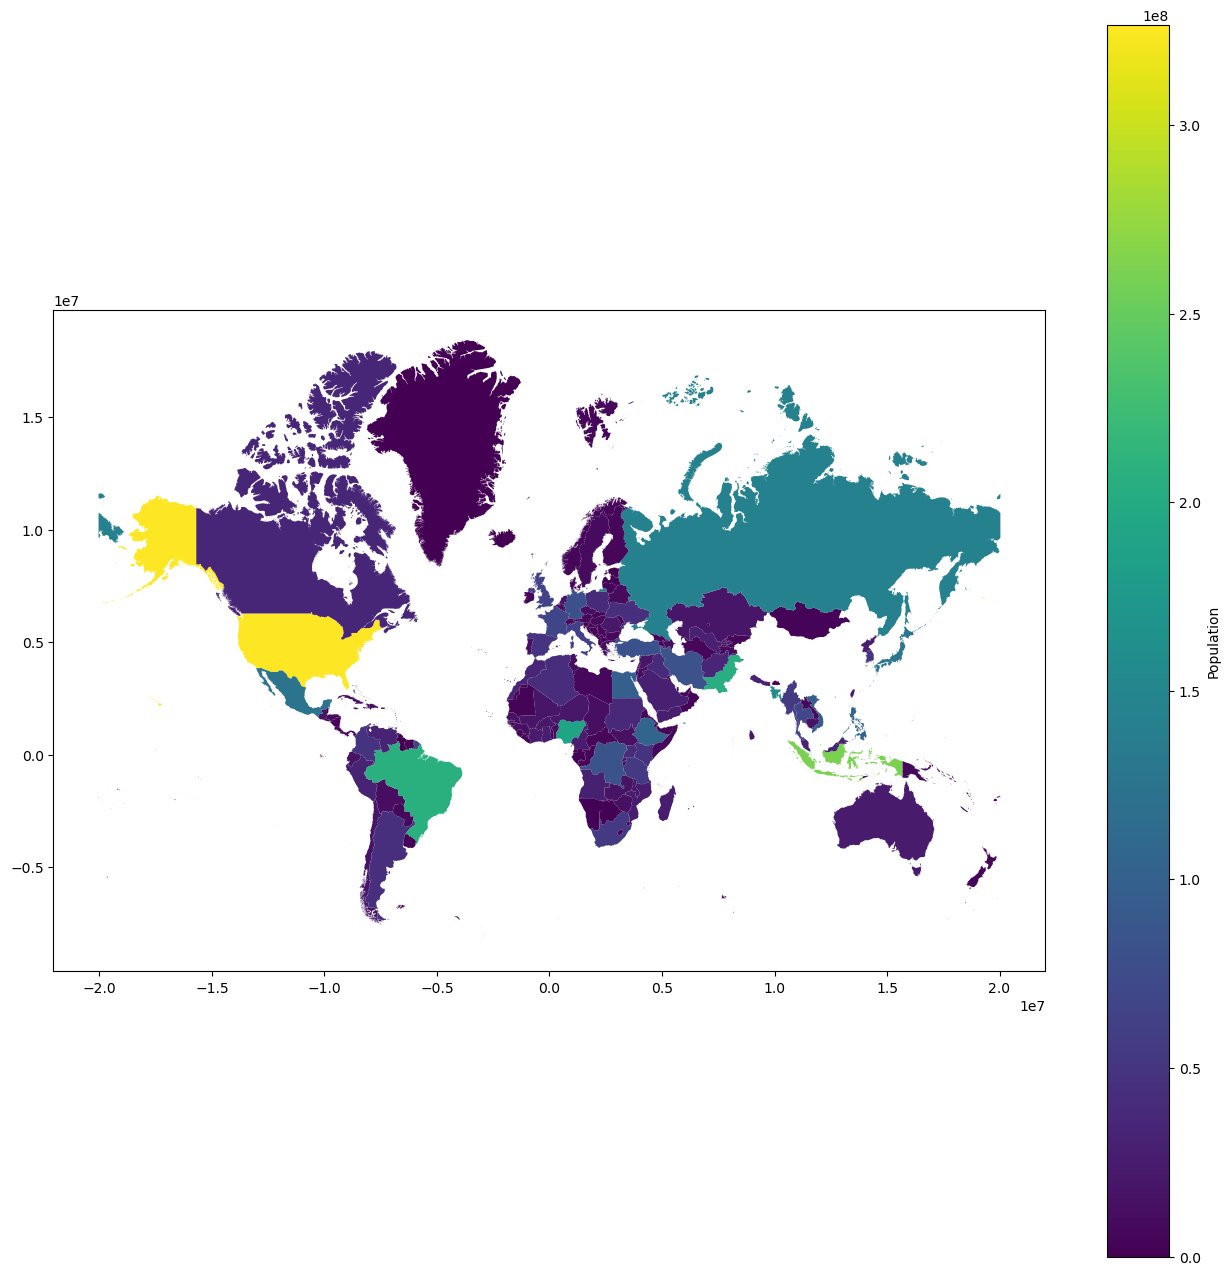

In [144]:
countries_plot.plot(column='POP_EST',legend=True,figsize=(16,16), legend_kwds={'label': 'Population'})

### matplotlib to show multiple data 

<Axes: >

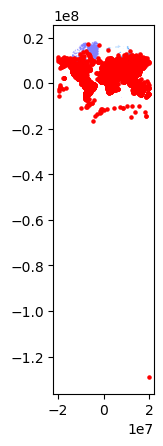

In [145]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m = places.to_crs(3857)
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

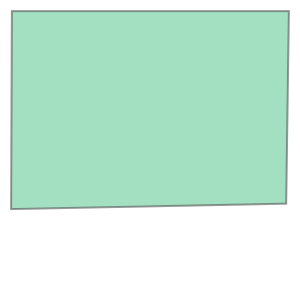

In [148]:
#load world polygon
bbox = gpd.read_file(path + '/world.geojson')
world = bbox.loc[0].geometry
world

In [149]:
cities_m = cities_m[cities_m.within(world)]

<Axes: >

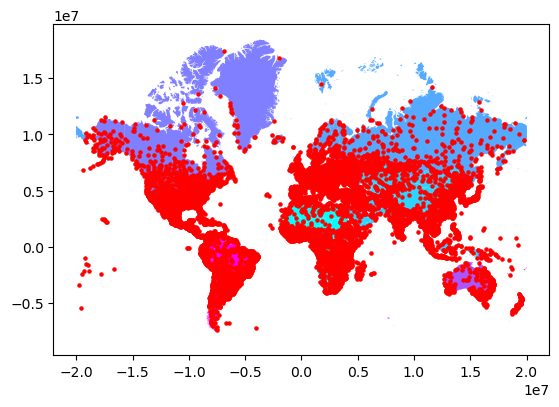

In [150]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

### geopandas overlay to show multiple data 

<Axes: >

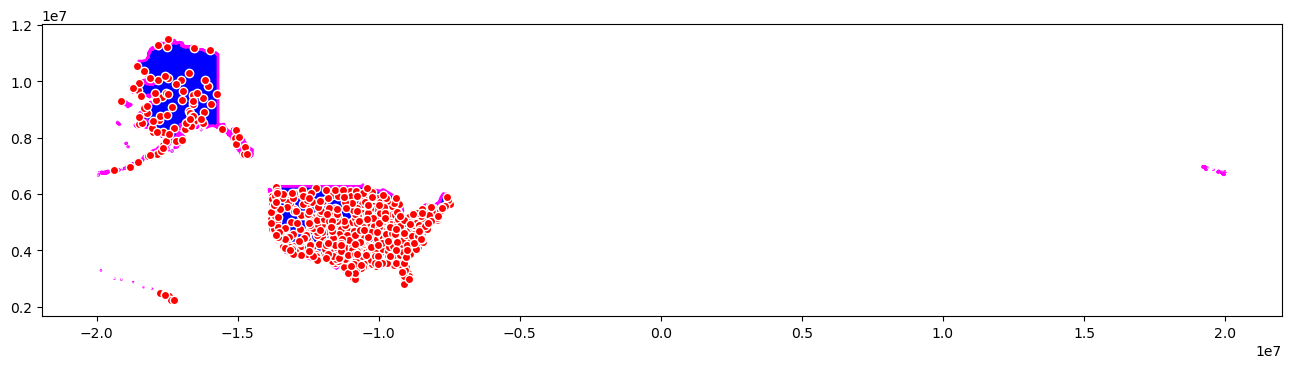

In [163]:
fig, ax = plt.subplots(figsize=(16, 16))

USA_m.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
USA_cities_m.plot(ax=ax, color='r', edgecolor='#fff')


In [166]:
USA_cities_m['geometry'] = USA_cities_m['geometry'].buffer(50000)

<Axes: >

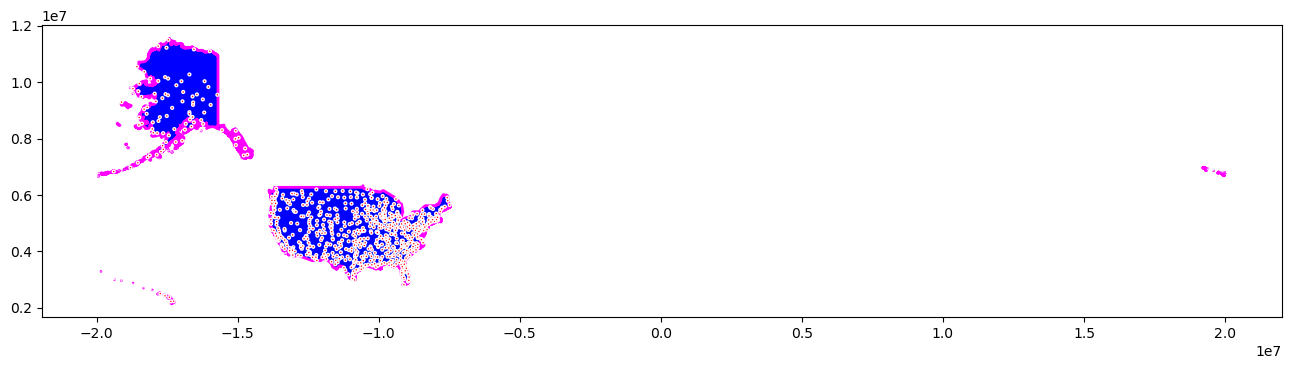

In [167]:
fig, ax = plt.subplots(figsize=(16, 16))

USA_m.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
USA_cities_m.plot(ax=ax, color='r', edgecolor='#fff')

<Axes: >

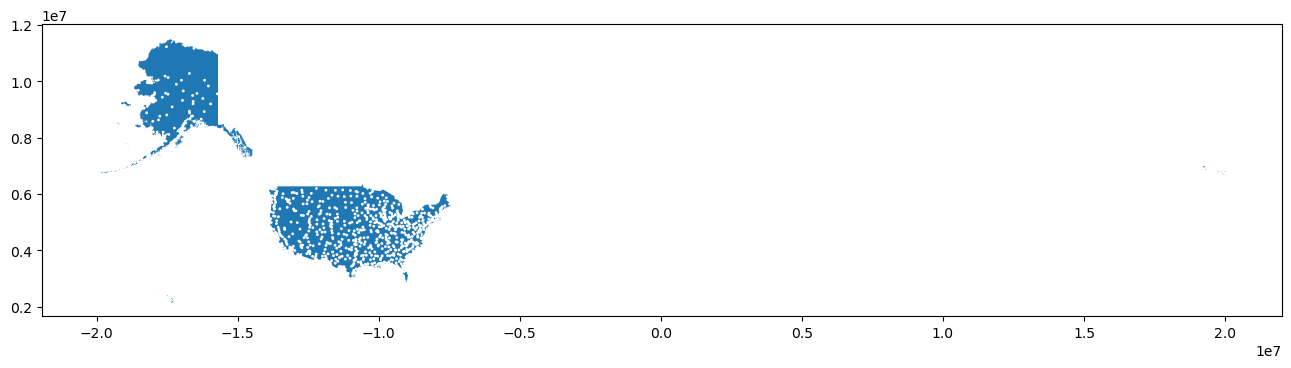

In [168]:
non_rural_area = gpd.overlay(USA_m, USA_cities_m, how='difference')
non_rural_area.plot(figsize=(16, 16))